import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


load dataset

In [1]:
# Load the dataset
import pandas as pd
train_data = pd.read_csv(r'C:\Users\ejiko\OneDrive\Documents\titanic survival prediction\train.csv')
test_data = pd.read_csv(r'C:\Users\ejiko\OneDrive\Documents\titanic survival prediction\test.csv')


Explore the data

In [3]:
# Display the first few rows of the training data
print(train_data.head())

# Display summary statistics
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

Handle Missing Values:

In [4]:
# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)


C:\Users\ejiko\AppData\Local\Temp\ipykernel_25704\1955664069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\ejiko\AppData\Local\Temp\ipykernel_25704\1955664069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Feature Engineering

In [5]:
# Convert categorical features to numeric
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Display the first few rows after preprocessing
print(train_data.head())


   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


Split the Data into Features and Target

In [6]:
# Define features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scale the Features

In [8]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train a Logistic Regression Model

In [9]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Make Predictions and Evaluate

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')


Accuracy: 0.8044692737430168
Confusion Matrix:
[[89 16]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



plotting graph

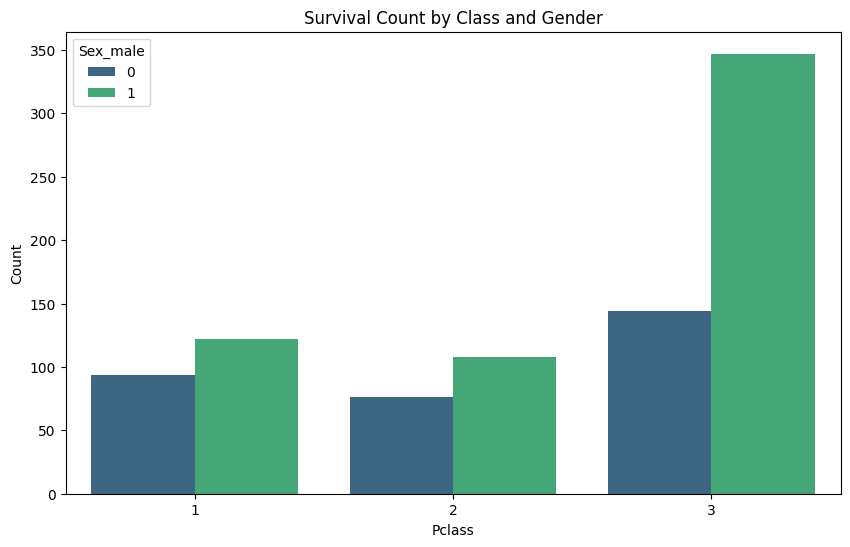

In [6]:



# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
train_data = pd.read_csv(r'C:\Users\ejiko\OneDrive\Documents\titanic survival prediction\train.csv')

# Check if the 'Sex' column exists and create 'Sex_male' column
if 'Sex' in train_data.columns:
    train_data['Sex_male'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Plotting graphs

# 1. Survival Count by Class and Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex_male', data=train_data, palette='viridis')
plt.title('Survival Count by Class and Gender')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()
